# 可视化分析

In [1]:
import pandas as pd
import matplotlib as mpl
from pandas import DataFrame, Series
import matplotlib.pyplot as plt

columns = ['城市', '区域', '商圈', '小区', '挂牌时间', '成交日期', '成交价（万）', '挂牌价格（万）', '成交周期（天）','房屋户型', '所在楼层', '建筑面积（㎡）','房屋朝向', '梯户比例', '链家编号','房权所属','经度', '纬度']
data = pd.read_excel(u'南昌.xlsx', na_values=" null")
data=data[columns]
data.rename(columns={'成交价（万）':'成交价','挂牌价格（万）':'挂牌价格', '成交周期（天）': '成交周期','建筑面积（㎡）':'建筑面积'},inplace=True)
data.head()

,城市,区域,商圈,小区,挂牌时间,成交日期,成交价,挂牌价格,成交周期,房屋户型,所在楼层,建筑面积,房屋朝向,梯户比例,链家编号,房权所属,经度,纬度
0,南昌,南昌县,昌南,正荣大湖之都（天境）,2019.09.22,2019.10.02,89,100.0,11,3室2厅1厨1卫,中楼层(共34层),89.26,东南,两梯四户,103106246200,非共有,115.930306,28.592477
1,南昌,南昌县,昌南,正荣大湖之都朗逸湾,2019.07.24,2019.09.26,92,101.0,65,3室2厅1厨1卫,中楼层(共6层),89.00,南北,一梯两户,103105472568,共有,115.932374,28.595547
2,南昌,南昌县,昌南,西水滨鹭岛,2019.09.22,2019.09.26,33,118.8,5,3室2厅1厨1卫,高楼层(共11层),112.00,东南,一梯四户,103106199349,非共有,115.929332,28.595596
3,南昌,南昌县,昌南,西水滨鹭岛,2019.09.26,2019.09.26,73,105.0,1,3室2厅1厨2卫,高楼层(共11层),78.00,南,一梯四户,103106310655,非共有,115.929332,28.595596
4,南昌,南昌县,昌南,正荣大湖之都朗逸湾,2019.09.22,2019.09.25,120,120.0,4,3室2厅1厨2卫,高楼层(共18层),118.11,南,两梯四户,103106247160,非共有,115.932374,28.595547


In [2]:
data.isnull().sum()

城市      0
区域      0
商圈      0
小区      0
挂牌时间    0
成交日期    0
成交价     0
挂牌价格    0
成交周期    0
房屋户型    0
所在楼层    0
建筑面积    0
房屋朝向    0
梯户比例    0
链家编号    0
房权所属    0
经度      0
纬度      0
dtype: int64

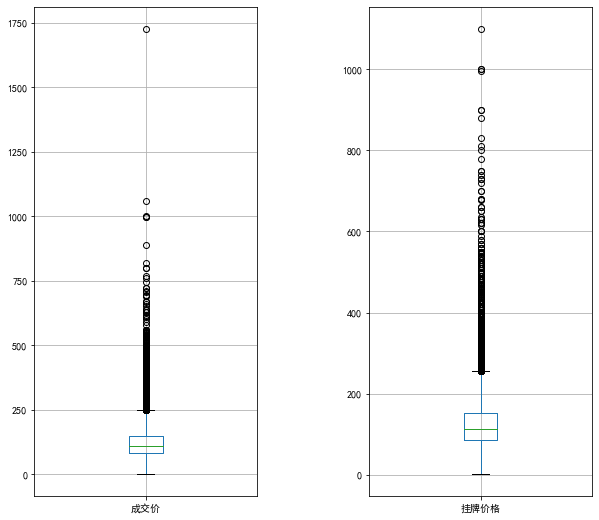

In [3]:
%matplotlib inline

plt.rcParams["font.sans-serif"] = ["SimHei"]#用来显示正常中文标签
plt.rcParams["axes.unicode_minus"] = False#用来正常显示负号
plt.rcParams['figure.figsize']=(10,9)
fig, axes = plt.subplots(1, 2)
fig.subplots_adjust(wspace=0.5)
data.boxplot(column="成交价", ax=axes[0])
data.boxplot(column="挂牌价格", ax=axes[1])
plt.show()


In [4]:
#由图可得， 接下来将总价大于1000万的归为异常值，小于1000万的归为正常值，
abnormal_data = data[data.成交价 > 1000]
normal_data = data[data.成交价 <= 1000]
abnormal_data.index = range(len(abnormal_data))
normal_data.index = range(len(normal_data))
abnormal_data.to_excel(u"异常值数据.xlsx", index=False)
normal_data.to_excel(u"正常值数据.xlsx", index=False)

normal_data.shape

(15276, 18)

In [5]:
columns = ['城市','区域','商圈', '小区', '挂牌时间', '成交日期', '成交价', '挂牌价格', '成交周期','房屋户型','所在楼层', '建筑面积', '房屋朝向', '梯户比例', '链家编号','房权所属','经度', '纬度']
data = pd.read_excel(u'正常值数据.xlsx', na_values=" null")
data.columns = columns
data.head()

,城市,区域,商圈,小区,挂牌时间,成交日期,成交价,挂牌价格,成交周期,房屋户型,所在楼层,建筑面积,房屋朝向,梯户比例,链家编号,房权所属,经度,纬度
0,南昌,南昌县,昌南,正荣大湖之都（天境）,2019.09.22,2019.10.02,89,100.0,11,3室2厅1厨1卫,中楼层(共34层),89.26,东南,两梯四户,103106246200,非共有,115.930306,28.592477
1,南昌,南昌县,昌南,正荣大湖之都朗逸湾,2019.07.24,2019.09.26,92,101.0,65,3室2厅1厨1卫,中楼层(共6层),89.00,南北,一梯两户,103105472568,共有,115.932374,28.595547
2,南昌,南昌县,昌南,西水滨鹭岛,2019.09.22,2019.09.26,33,118.8,5,3室2厅1厨1卫,高楼层(共11层),112.00,东南,一梯四户,103106199349,非共有,115.929332,28.595596
3,南昌,南昌县,昌南,西水滨鹭岛,2019.09.26,2019.09.26,73,105.0,1,3室2厅1厨2卫,高楼层(共11层),78.00,南,一梯四户,103106310655,非共有,115.929332,28.595596
4,南昌,南昌县,昌南,正荣大湖之都朗逸湾,2019.09.22,2019.09.25,120,120.0,4,3室2厅1厨2卫,高楼层(共18层),118.11,南,两梯四户,103106247160,非共有,115.932374,28.595547


In [6]:
g = data.groupby('区域')
df_region = g.count()['小区']
region = df_region.index.tolist()
count = df_region.values.tolist()
df_region

区域
东湖区      834
南昌县     4516
新建区     1585
湾里区      273
红谷滩     2857
经开区      918
西湖区     1289
进贤县      209
青云谱区     488
青山湖区     968
高新区     1339
Name: 小区, dtype: int64

In [7]:
import pandas as pd
from pyecharts.charts import Map
from pyecharts.charts import Bar
from pyecharts.charts import Line
from pyecharts.charts import Grid
from pyecharts.charts import Pie
from pyecharts.charts import Scatter
from pyecharts import options as opts

g = data.groupby('区域')
df_region = g.count()['小区']
region = df_region.index.tolist()
count = df_region.values.tolist()
print(count)
new = [x + '' for x in region]
m = (
        Map()
        .add('', [list(z) for z in zip(new, count)], '南昌')
        .set_global_opts(
            title_opts=opts.TitleOpts(title='南昌市二手房各区分布'),
            visualmap_opts=opts.VisualMapOpts(max_=3000),
        )
    )
m.render_notebook()

[834, 4516, 1585, 273, 2857, 918, 1289, 209, 488, 968, 1339]


In [8]:
# 各城区二手房数量-平均价格柱状图
df_price = g.mean()['成交价']
price = [round(x,2) for x in df_price.values.tolist()]
bar = (
    Bar()
    .add_xaxis(region)
    .add_yaxis('数量', count,
              label_opts=opts.LabelOpts(is_show=True))
    .extend_axis(
        yaxis=opts.AxisOpts(
            name="价格（万元）",
            type_="value",
            min_=0,
            max_=200,
            interval=20,
            axislabel_opts=opts.LabelOpts(formatter="{value}"),
        )
    )
    .set_global_opts(
        tooltip_opts=opts.TooltipOpts(
            is_show=True, trigger="axis", axis_pointer_type="cross"
        ),
        xaxis_opts=opts.AxisOpts(
            type_="category",
            axispointer_opts=opts.AxisPointerOpts(is_show=True, type_="shadow"),
        ),
        yaxis_opts=opts.AxisOpts(name='数量',
            axistick_opts=opts.AxisTickOpts(is_show=True),
            splitline_opts=opts.SplitLineOpts(is_show=False),)
    )
)
line2 = (
    Line()
    .add_xaxis(xaxis_data=region)
    .add_yaxis(
 
        series_name="价格",
        yaxis_index=1,
        y_axis=price,
        label_opts=opts.LabelOpts(is_show=True),
        )
)
bar.overlap(line2)
grid = Grid()
grid.add(bar, opts.GridOpts(pos_left="5%", pos_right="20%"), is_control_axis_index=True)
grid.render_notebook()

In [9]:
df_fitment = g.count()['小区']
fitment = df_fitment.index.tolist()
count1 = df_fitment.values.tolist()
df_direction = g.count()['小区']
directions = df_direction.index.tolist()
count2 = df_direction.values.tolist()
bar = (
    Bar()
    .add_xaxis(fitment)
    .add_yaxis('', count1, category_gap = '50%')
    .reversal_axis()
    .set_series_opts(label_opts=opts.LabelOpts(position='right'))
    .set_global_opts(
        yaxis_opts=opts.AxisOpts(name='装修情况'),
        xaxis_opts=opts.AxisOpts(name='数量'),
        title_opts=opts.TitleOpts(title='',pos_left='33%',pos_top="5%"),
        legend_opts=opts.LegendOpts(type_="scroll", pos_left="90%",pos_top="58%",orient="vertical")
    )
)

c2 = (
    Pie(init_opts=opts.InitOpts(
            width='800px', height='600px',
            )
       )
        .add(
 '',
        [list(z) for z in zip(directions, count2)],
        radius=['10%', '30%'],
 center=['75%', '65%'],
        rosetype="radius",
        label_opts=opts.LabelOpts(is_show=True),
        )
        .set_global_opts(title_opts=opts.TitleOpts(title='有/无电梯',pos_left='33%',pos_top="5%"),
                        legend_opts=opts.LegendOpts(type_="scroll", pos_left="90%",pos_top="15%",orient="vertical")
                        )
        .set_series_opts(label_opts=opts.LabelOpts(formatter='{b}:{c} \n ({d}%)'),position="outside")
    )

bar.overlap(c2)
bar.render_notebook()

In [10]:
from pyecharts.charts import Scatter
s = (
    Scatter()
    .add_xaxis(data['建筑面积'].values.tolist())
    .add_yaxis('',data['成交价'].values.tolist())
    .set_global_opts(xaxis_opts=opts.AxisOpts(name='面积(㎡)',type_='value'),
                    yaxis_opts=opts.AxisOpts(name='价格(万元)'),)
)
s.render_notebook()

E:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


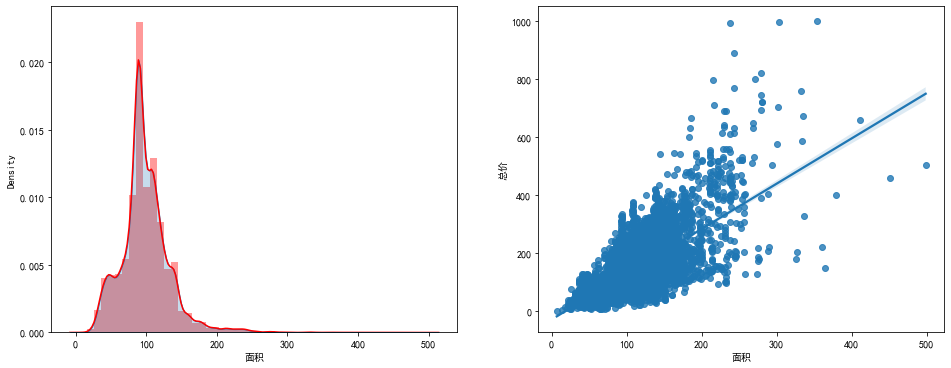

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

f, [ax1,ax2] = plt.subplots(1, 2, figsize=(16, 6))

# 房屋面积
sns.distplot(data['建筑面积'], ax=ax1, color='r')
sns.kdeplot(data['建筑面积'], shade=True, ax=ax1)
ax1.set_xlabel('面积')

# 房屋面积和价格的关系
sns.regplot(x='建筑面积', y='成交价', data=data, ax=ax2)
ax2.set_xlabel('面积')
ax2.set_ylabel('总价')

plt.show()

In [12]:
from pyecharts.charts import Map
from pyecharts.charts import Bar
from pyecharts.charts import Line
from pyecharts.charts import Grid
from pyecharts.charts import Pie
from pyecharts.charts import Scatter
from pyecharts import options as opts
from pyecharts.globals import ThemeType
series = data['房屋户型'].value_counts()
series.sort_index(ascending=False, inplace=True)
house_type_list = series.index.tolist()
count_list = series.values.tolist()

c = Bar(init_opts=opts.InitOpts(theme=ThemeType.CHALK))
c.add_xaxis(house_type_list)
c.add_yaxis("南昌市", count_list)
c.reversal_axis()
c.set_series_opts(label_opts=opts.LabelOpts(position="right"))
c.set_global_opts(title_opts=opts.TitleOpts(title="南昌二手房各户型横向条形图"),
                datazoom_opts=[opts.DataZoomOpts(yaxis_index=0, type_="slider", orient="vertical")],)
# c.render("武汉二手房各户型横向条形图.html")
c.render_notebook()

In [13]:
from collections import Counter
temp_data=pd.read_excel(u'南昌.xlsx', na_values=" null")
# 只统计关注人数超过三人的热门二手房
detail_df = temp_data.loc[temp_data['关注（人）'] > 3]
label_list = []
for house_label in detail_df['房屋用途'].values.tolist():
    label_list += house_label.split(',')
label_and_count = Counter(label_list)
label_and_count = label_and_count.most_common()

from pyecharts.charts import Funnel

c = Funnel(init_opts=opts.InitOpts(theme=ThemeType.CHALK))
c.add("商品", [list(z) for z in label_and_count])
c.set_global_opts(title_opts=opts.TitleOpts(title="南昌热门二手房用途漏斗图"))
# c.render("武汉热门二手房标签漏斗图.html")
c.render_notebook()

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\STUDYH~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.640 seconds.
Prefix dict has been built succesfully.


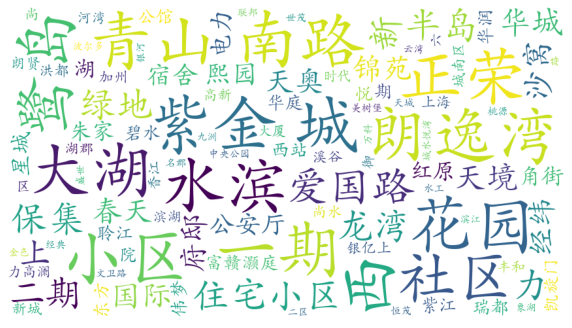

In [14]:
import pandas as pd
import jieba
from tkinter import _flatten
import matplotlib.pyplot as plt
from wordcloud import WordCloud
comments=data['小区']
# with open(r'stop_words.txt','r',encoding='utf-8')as f:
#     stopWords=f.read()
stopwords=['\n','的','了','最','不会','带', "@", "我", "她", "你", "他", "了", "的", "吧", "吗", "在", "啊", "不", "也", "还", "是",
             "说", "都", "就", "没", "做", "人", "被", "不是", "现在", "什么", "这", "呢", "知道", "邓", "我们", "他们", "和", "有", "", "",
            "要", "就是", "但是", "而", "为", "自己", "中", "问题", "一个", "没有", "到", "这个", "并", "对","之"]


    #stopWords = f.read().split("\n")  

# 设置分词
comment_after_split = jieba.cut(str(comments), cut_all=False)  # 非全模式分词，cut_all=false
words = ' '.join(comment_after_split)  # 以空格进行拼接

# 设置词云参数，参数分别表示：画布宽高、背景颜色、背景图形状、字体、屏蔽词、最大词的字体大小
wc = WordCloud(background_color="white",repeat=True,max_words=100,height=480,width=854, font_path='STKAITI.TTF', stopwords=stopwords,
               max_font_size=100, random_state=50)
# 将分词后数据传入云图
wc.generate_from_text(words)
plt.imshow(wc)
plt.axis('off')  # 不显示坐标轴
plt.show()
# 保存结果到本地
wc.to_file('词云图.jpg')

# 灰度关联分析

指标选取 区域、建筑面积、建筑类型、房屋朝向、装修情况、卧室数、客厅数、房龄、所在楼层、总楼层、配备电梯

In [15]:
import re
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

data = pd.read_excel(u'南昌.xlsx', na_values=" null")
data.rename(columns={'成交价（万）':'成交价','挂牌价格（万）':'挂牌价格', '成交周期（天）': '成交周期','建筑面积（㎡）':'建筑面积'},inplace=True)

In [16]:
#预处理
le_area=LabelEncoder()
data['区域']=le_area.fit_transform(data['区域'])+1

le_building_kind=LabelEncoder()
data['建筑类型']=le_building_kind.fit_transform(data['建筑类型'])+1

le_building_dir=LabelEncoder()
data['房屋朝向']=le_building_dir.fit_transform(data['房屋朝向'].apply(lambda x:x[0]))+1

data['装修情况']=data['装修情况'].map({'其他':1,'毛坯':2,'简装':3,'精装':4})

data['卧室数']=data['房屋户型'].apply(lambda x:re.search('(\d+)室(\d+)厅(\d)厨(\d+)卫',x).group(1) if re.search('(\d+)室(\d+)厅(\d)厨(\d+)卫',x) else 0).astype(int)
data['客厅数']=data['房屋户型'].apply(lambda x:re.search('(\d+)室(\d+)厅(\d)厨(\d+)卫',x).group(2) if re.search('(\d+)室(\d+)厅(\d)厨(\d+)卫',x) else 0).astype(int)

data['房龄']=data['建成年代'].apply(lambda x:np.NaN if x=='未知' else 2022-int(x))
data['房龄'].fillna(data['房龄'].median(),inplace=True)

data['总楼层']=data['所在楼层'].apply(lambda x:re.search('共(\d+)层',x).group(1)).astype(int)

data['所在楼层']=data['所在楼层'].apply(lambda x:x[0])
data['所在楼层']=data['所在楼层'].map({'低':1,'中':2,'高':3})
data['配备电梯']=data['配备电梯'].map({'暂无数据':1,'无':2,'有':3})

data['均价']=data['成交价']/data['建筑面积']

In [17]:
df=data['区域、建筑面积、建筑类型、房屋朝向、装修情况、卧室数、客厅数、房龄、所在楼层、总楼层、配备电梯'.split('、')+['均价']]
df.head()

,区域,建筑面积,建筑类型,房屋朝向,装修情况,卧室数,客厅数,房龄,所在楼层,总楼层,配备电梯,均价
0,2,89.26,5,1,1,3,2,9.0,2,34,3,0.997087
1,2,89.00,5,3,4,3,2,10.0,2,6,2,1.033708
2,2,112.00,5,1,1,3,2,9.0,3,11,3,0.294643
3,2,78.00,5,3,1,3,2,9.0,3,11,3,0.935897
4,2,118.11,5,3,1,3,2,9.0,3,18,3,1.016002


## 绝对灰度关联分析

In [18]:
transform_df=df-df.iloc[0,:]
transform_df.head()

,区域,建筑面积,建筑类型,房屋朝向,装修情况,卧室数,客厅数,房龄,所在楼层,总楼层,配备电梯,均价
0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,-0.26,0.0,2.0,3.0,0.0,0.0,1.0,0.0,-28.0,-1.0,0.036621
2,0.0,22.74,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-23.0,0.0,-0.702444
3,0.0,-11.26,0.0,2.0,0.0,0.0,0.0,0.0,1.0,-23.0,0.0,-0.061190
4,0.0,28.85,0.0,2.0,0.0,0.0,0.0,0.0,1.0,-16.0,0.0,0.018915


In [19]:
rho=dict()
for col in transform_df.columns:
    series=transform_df[col].values
    s=np.abs(series[:-1].sum()+series[-1]/2)
    series=(transform_df[col]-transform_df['均价']).values
    diff=np.abs(series[:-1].sum()+series[-1]/2)
    rho[col]=[s,diff]

for col in rho:
    r=(1+rho[col][0]+rho['均价'][0])/(1+rho[col][0]+rho['均价'][0]+rho[col][1])
    print(f'{col}:{r:.5f}')

区域:0.54009
建筑面积:0.51239
建筑类型:0.50001
房屋朝向:0.56378
装修情况:0.56915
卧室数:0.50003
客厅数:0.50004
房龄:0.74799
所在楼层:0.64082
总楼层:0.50000
配备电梯:0.50002
均价:1.00000


## 相对灰度关联分析

In [20]:
transform_df=df/df.iloc[0,:]
transform_df=transform_df-transform_df.iloc[0,:]
transform_df.head()

,区域,建筑面积,建筑类型,房屋朝向,装修情况,卧室数,客厅数,房龄,所在楼层,总楼层,配备电梯,均价
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
1,0.0,-0.002913,0.0,2.0,3.0,0.0,0.0,0.111111,0.0,-0.823529,-0.333333,0.036728
2,0.0,0.254761,0.0,0.0,0.0,0.0,0.0,0.000000,0.5,-0.676471,0.000000,-0.704496
3,0.0,-0.126148,0.0,2.0,0.0,0.0,0.0,0.000000,0.5,-0.676471,0.000000,-0.061368
4,0.0,0.323213,0.0,2.0,0.0,0.0,0.0,0.000000,0.5,-0.470588,0.000000,0.018970


In [21]:
rho=dict()
for col in transform_df.columns:
    series=transform_df[col].values
    s=np.abs(series[:-1].sum()+series[-1]/2)
    series=(transform_df[col]-transform_df['均价']).values
    diff=np.abs(series[:-1].sum()+series[-1]/2)
    rho[col]=[s,diff]

for col in rho:
    r=(1+rho[col][0]+rho['均价'][0])/(1+rho[col][0]+rho['均价'][0]+rho[col][1])
    print(f'{col}:{r:.5f}')

区域:0.58041
建筑面积:0.72555
建筑类型:0.50004
房屋朝向:0.56397
装修情况:0.56935
卧室数:0.50005
客厅数:0.50005
房龄:0.61175
所在楼层:0.57024
总楼层:0.50002
配备电梯:0.50004
均价:1.00000


# 半对数模型

区域 、商圈 、所属品牌、建筑面积、建筑类型、房屋朝向、装修情况、卧室数、客厅数、房龄、所在楼层、总楼层、配备电梯

In [22]:
import numpy as np
import pandas as pd

data = pd.read_excel(u'南昌.xlsx', na_values=" null")
data.rename(columns={'成交价（万）':'成交价','挂牌价格（万）':'挂牌价格', '成交周期（天）': '成交周期','建筑面积（㎡）':'建筑面积'},inplace=True)

In [23]:
#预处理
dummpy_columns=['区域','商圈','所属品牌','建筑类型','房屋朝向','装修情况','所在楼层','配备电梯']

ref=data['商圈'].value_counts()
data['商圈']=data['商圈'].apply(lambda x:'热门' if ref[x]>1000 else '一般')

ref=data['小区'].value_counts()
data['所属品牌']=data['小区'].apply(lambda x:'热门' if ref[x]>50 else '一般')

data['房屋朝向']=data['房屋朝向'].apply(lambda x:'南' if '南' in x else '其他')

data['卧室数']=data['房屋户型'].apply(lambda x:re.search('(\d+)室(\d+)厅(\d)厨(\d+)卫',x).group(1) if re.search('(\d+)室(\d+)厅(\d)厨(\d+)卫',x) else 0).astype(int)
data['客厅数']=data['房屋户型'].apply(lambda x:re.search('(\d+)室(\d+)厅(\d)厨(\d+)卫',x).group(2) if re.search('(\d+)室(\d+)厅(\d)厨(\d+)卫',x) else 0).astype(int)

data['房龄']=data['建成年代'].apply(lambda x:np.NaN if x=='未知' else 2022-int(x))
data['房龄'].fillna(data['房龄'].median(),inplace=True)

data['总楼层']=data['所在楼层'].apply(lambda x:re.search('共(\d+)层',x).group(1)).astype(int)

data['所在楼层']=data['所在楼层'].apply(lambda x:x[0])

data['均价']=data['成交价']/data['建筑面积']

df=data['区域、商圈、所属品牌、建筑面积、建筑类型、房屋朝向、装修情况、卧室数、客厅数、房龄、所在楼层、总楼层、配备电梯'.split('、')+['均价']]
# one hot
df=pd.get_dummies(df,columns=dummpy_columns)
df.head()

,建筑面积,卧室数,客厅数,房龄,总楼层,均价,区域_东湖区,区域_南昌县,区域_新建区,区域_湾里区,...,装修情况_其他,装修情况_毛坯,装修情况_简装,装修情况_精装,所在楼层_中,所在楼层_低,所在楼层_高,配备电梯_无,配备电梯_暂无数据,配备电梯_有
0,89.26,3,2,9.0,34,0.997087,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
1,89.00,3,2,10.0,6,1.033708,0,1,0,0,...,0,0,0,1,1,0,0,1,0,0
2,112.00,3,2,9.0,11,0.294643,0,1,0,0,...,1,0,0,0,0,0,1,0,0,1
3,78.00,3,2,9.0,11,0.935897,0,1,0,0,...,1,0,0,0,0,0,1,0,0,1
4,118.11,3,2,9.0,18,1.016002,0,1,0,0,...,1,0,0,0,0,0,1,0,0,1


取对数前是长尾分布

<AxesSubplot:ylabel='Frequency'>

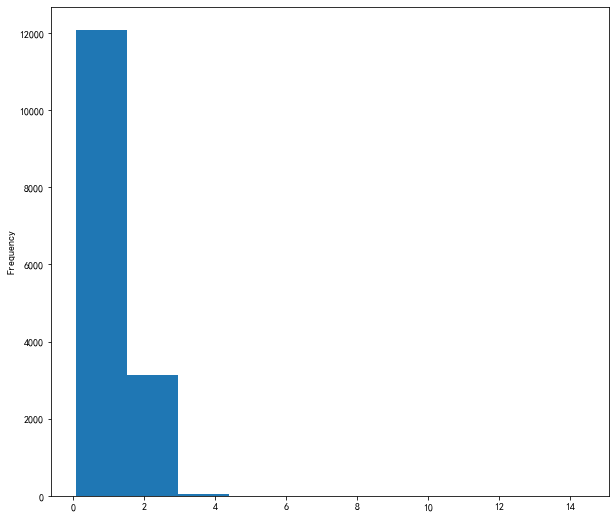

In [24]:
df['均价'].plot.hist()

取对数后近似正态分布，满足线性假设

<AxesSubplot:ylabel='Frequency'>

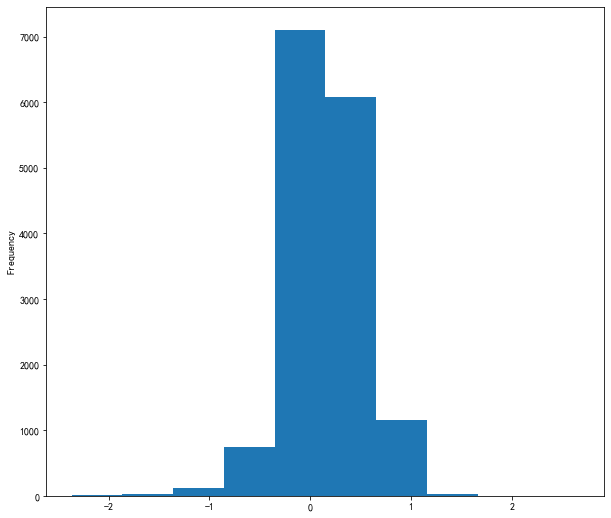

In [25]:
np.log(df['均价']).plot.hist()

In [26]:
import statsmodels.api as sm
df['均价']=np.log(df['均价'])
target=df.pop('均价')
X=df
Y=target
X=sm.add_constant(X)
model=sm.OLS(Y,X)
results=model.fit()

E:\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [27]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     均价   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     513.3
Date:                Thu, 05 May 2022   Prob (F-statistic):               0.00
Time:                        14:19:57   Log-Likelihood:                -826.18
No. Observations:               15278   AIC:                             1712.
Df Residuals:                   15248   BIC:                             1941.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0566      0.003    -16.443      0.0